In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import pyroounfold
from pyroounfold.toy_unfold import toy_unfold
from pyroounfold.unfold import unfold
from pyroounfold.plotting import plot_compare_single_run,  plot_compare_para, get_bin_centers, get_bin_widths, plot_unf_scan, plot_unf_fom_my, plot_unf_toys
from pyroounfold.utils.roo_convertor import th1_to_arr, df_to_roounf

Welcome to JupyROOT 6.14/04


As an example, we create an artificial variable to play. In practical application, this can be skipped and start from reading in actual ntuples/rootfiles as pandas.dataframe. 

In [2]:
# Gaussian smearing function
import ROOT

def smear(xt):
    xsmear= ROOT.gRandom.Gaus(-2.5,0.2)
    return xt+xsmear;

df_train = pd.DataFrame(columns=['truth','measured', 'weight'])  # dataframe providing migration matrix, e.g. MC
df_test = pd.DataFrame(columns=['truth','measured', 'weight'])   # dataframe providing distribution to be unfolded, e.g. toy MC, or data as 'measured'


df_train['truth'] = [ ROOT.gRandom.BreitWigner(0.3, 2.5) for x in range(100000)]
df_train['measured'] = smear(df_train['truth'])
df_train['weight'] = 1.

df_test['truth'] = [ ROOT.gRandom.Gaus(0.0, 2.0) for x in range(10000)]
df_test['measured'] = smear(df_test['truth'])
df_test['weight'] = 1.

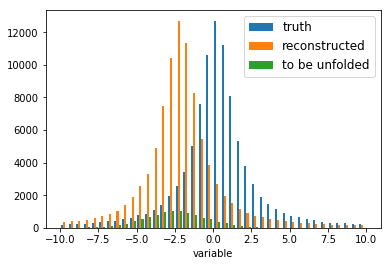

In [3]:
# have a look at the fictional data
my_bins = np.linspace(-10,10,41)

plt.hist([df_train['truth'], df_train['measured'], df_test['measured']], 
         label=['truth', 'reconstructed', 'to be unfolded'], bins = my_bins )
plt.xlabel('variable')
plt.legend(loc='upper right', prop={'size':12})
plt.show()
plt.close()

Let's start with the most simple example. No input bin-wise uncertainty or covariance matrix. The default bin error is square root of the bin count.

In [4]:
# define unfold class with all input

example_a = unfold(
    
    df_train = df_train,                     
    weight_train = df_train['weight'], 
    df_test = df_test,                       
    weight_test = df_test['weight'], 
    name_var_true = 'truth', 
    name_var_reco = 'measured',  
    show_var = 'variable',   # just for plotting
    bins = my_bins
    
    ## optional input
    # reco_bin_error = measured bin-wiese uncertainty
    # reco_cov = measured covariance matrix
    # kcovtoy = if False, error propagation is based on full covariance matrix; 
    #           if True, error propagation is based on internal toys generated by RooUnfold. Default is False. 
    # mc_stat_err = exclude (0, default) or include (1) or only (2) the effect of MC statistics uncertainty on migration matrix evaluated with interal toys.
    )


Now everything needed to launch unfolding is ready !!!

Let's give it a first try, e.g. SVD method with k=0 (default value will be taken by algorithm, i.e. #bins/2)

In [5]:
example_a.do_Svd(0)
    
#example_a.do_Invert()
#example_a.do_BinByBin()

SVD init 40 x 40 bins, kreg=20


Info in <TSVDUnfold_130729::Unfold>: Unfolding param: 20
Info in <TSVDUnfold_130729::Unfold>: Curvature of weight distribution: 0.003797


In [6]:
# unfolded result

example_a.result_df

,bin_index,truth_central,truth_stat_error,measured_central,measured_error,unfolded_central,unfolded_error
0,0,0.0,0.000000,3.0,1.732051,0.557234,3.488718
1,1,0.0,0.000000,5.0,2.236068,0.681334,3.522817
2,2,0.0,0.000000,6.0,2.449490,1.011481,3.699059
3,3,1.0,1.000000,22.0,4.690416,1.271691,2.895884
4,4,0.0,0.000000,34.0,5.830952,2.223960,2.711121
5,5,3.0,1.732051,47.0,6.855655,3.003067,1.540172
6,6,4.0,2.000000,102.0,10.099505,4.560288,1.656089
7,7,7.0,2.645751,150.0,12.247449,7.478896,1.912585
8,8,22.0,4.690416,254.0,15.937377,19.259970,2.803310
9,9,33.0,5.744563,404.0,20.099751,32.987072,3.607884


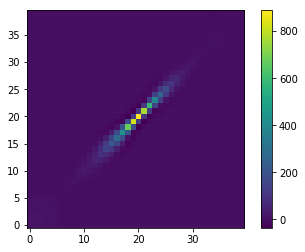

In [7]:
# post-unfold covariance matrix

cov = example_a.result_cov

plt.imshow(cov, origin='low')
plt.colorbar()
plt.show()

We can plot the unfolded result comparing with the truth.

/Users/caolu/Library/Python/3.7/lib/python/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


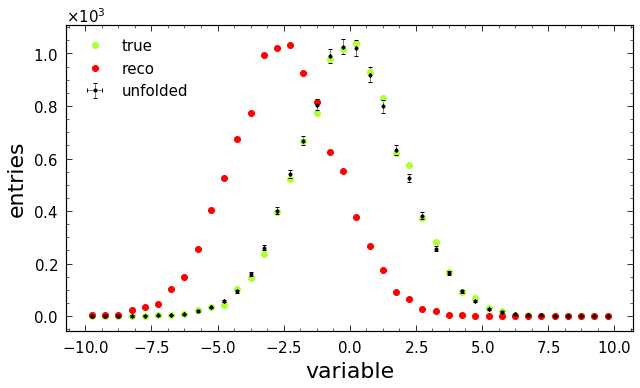

In [8]:
fig = plot_compare_single_run(example_a.result_df, my_bins, 'variable', 'entries')

Try other methods..

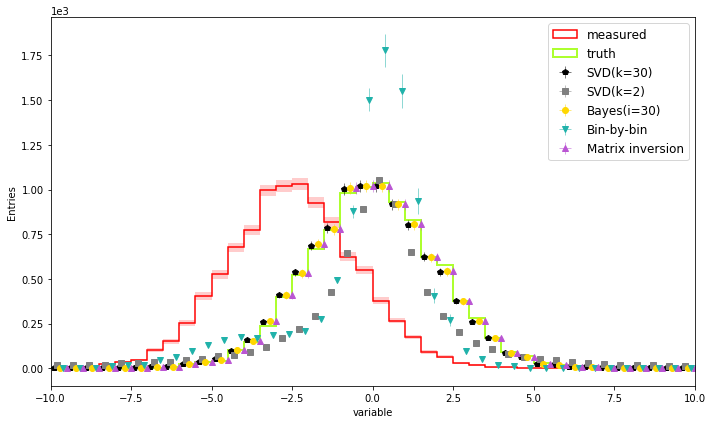

SVD init 40 x 40 bins, kreg=30
SVD init 40 x 40 bins, kreg=2
Now unfolding...
Iteration : 0
Chi^2 of change 1046
Iteration : 1
Chi^2 of change 0.477427
Iteration : 2
Chi^2 of change 0.0119593
Iteration : 3
Chi^2 of change 0.000592222
Iteration : 4
Chi^2 of change 3.51024e-05
Iteration : 5
Chi^2 of change 2.34568e-06
Iteration : 6
Chi^2 of change 1.70219e-07
Iteration : 7
Chi^2 of change 1.30419e-08
Iteration : 8
Chi^2 of change 1.03461e-09
Iteration : 9
Chi^2 of change 8.38952e-11
Iteration : 10
Chi^2 of change 6.89752e-12
Iteration : 11
Chi^2 of change 5.72033e-13
Iteration : 12
Chi^2 of change 4.77013e-14
Iteration : 13
Chi^2 of change 3.99157e-15
Iteration : 14
Chi^2 of change 3.34743e-16
Iteration : 15
Chi^2 of change 2.81116e-17
Iteration : 16
Chi^2 of change 2.36289e-18
Iteration : 17
Chi^2 of change 1.98722e-19
Iteration : 18
Chi^2 of change 1.67189e-20
Iteration : 19
Chi^2 of change 1.40693e-21
Iteration : 20
Chi^2 of change 1.18404e-22
Iteration : 21
Chi^2 of change 9.96742e-2

Info in <TSVDUnfold_130729::Unfold>: Unfolding param: 30
Info in <TSVDUnfold_130729::Unfold>: Curvature of weight distribution: 0.010071
Info in <TSVDUnfold_130729::Unfold>: Unfolding param: 2
Info in <TSVDUnfold_130729::Unfold>: Curvature of weight distribution: 0.000000


In [9]:
example_a.do_Svd(30)
unf_cen_svd = example_a.result_df['unfolded_central'].copy()
unf_err_svd = example_a.result_df['unfolded_error'].copy()

example_a.do_Svd(2)
unf_cen_svd_low = example_a.result_df['unfolded_central'].copy()
unf_err_svd_low = example_a.result_df['unfolded_error'].copy()

example_a.do_Invert()
unf_cen_inv = example_a.result_df['unfolded_central'].copy()
unf_err_inv = example_a.result_df['unfolded_error'].copy()

example_a.do_BinByBin()
unf_cen_byb = example_a.result_df['unfolded_central'].copy()
unf_err_byb = example_a.result_df['unfolded_error'].copy()

example_a.do_Bayes(30)
unf_cen_bay = example_a.result_df['unfolded_central'].copy()
unf_err_bay = example_a.result_df['unfolded_error'].copy()



truth_cen = example_a.result_df['truth_central']
measu_cen, measu_err = example_a.result_df['measured_central'], example_a.result_df['measured_error']

f = plt.figure(figsize=(10,6))
plt.hist(get_bin_centers(my_bins), bins=my_bins, weights=measu_cen, histtype='step', lw=1.5, color='red', label='measured')
plt.bar(get_bin_centers(my_bins),
       height=measu_err*2,
       width=get_bin_widths(my_bins),
       bottom=measu_cen - measu_err,
       alpha=0.2, color='red'
       )  

plt.hist(get_bin_centers(my_bins), bins=my_bins, weights=truth_cen, histtype='step', lw=2, color='greenyellow',  label='truth')

s=get_bin_widths(my_bins)/5

plt.errorbar(x=my_bins[:-1]+s*1, y=unf_cen_svd, \
                 yerr=unf_err_svd, xerr=0, marker='p', color='black',ls='', elinewidth=0.5,  label='SVD(k=30)')

plt.errorbar(x=my_bins[:-1]+s*2, y=unf_cen_svd_low, \
                 yerr=unf_err_svd_low, xerr=0, marker='s', color='gray',ls='', elinewidth=0.5, label='SVD(k=2)')

plt.errorbar(x=my_bins[:-1]+s*3, y=unf_cen_bay, \
                 yerr=unf_err_bay, xerr=0, marker='o', color='gold',ls='', elinewidth=0.5,  label='Bayes(i=30)')

plt.errorbar(x=my_bins[:-1]+s*4, y=unf_cen_byb, \
                 yerr=unf_err_byb, xerr=0, marker='v', color='lightseagreen',ls='', elinewidth=0.5,  label='Bin-by-bin')

plt.errorbar(x=my_bins[:-1]+s*5, y=unf_cen_inv, \
                 yerr=unf_err_inv, xerr=0, marker='^', color='mediumorchid',ls='', elinewidth=0.5,  label='Matrix inversion')



plt.xlim(-10,10)
plt.xlabel('variable')
plt.ylabel('Entries')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(loc=1, prop={'size':12})
plt.tight_layout()
plt.show()
plt.close()
#f.savefig('compare_all.pdf')

Some FoM are defined for bias study: 

a -- $\sum_{i}{|b_{i}|}$ 

b -- $\sum_{i}{|b_{i}|/N_{i}^{\text{true}}}$

c -- $\sum_{i}{b_{i}}$ 

d -- $\sqrt{\sum_{i,j}Cov_{i,j}}$

e -- $\sum_{i}{|b_{i}|}/\sqrt{\sum_{i,j}Cov_{i,j}}$ 

f -- $\sqrt{(\sum_{i}{|b_{i}|})^{2} + \sum_{i,j}Cov_{i,j}}$ 

g -- $\sum_{i}{|b_{i}|}/\sqrt{Cov_{i,i}}$ 

where $b_{i} = N_{i}^{\text{unfolded}} - N_{i}^{\text{true}}$ is the bias in each bin, and $Cov_{i,j}$ is the obtained post-unfold covariance matrix.

In [10]:
# calculate all FOM
example_a.do_Svd(28)
example_a.check_bias()

SVD init 40 x 40 bins, kreg=28


Info in <TSVDUnfold_130729::Unfold>: Unfolding param: 28
Info in <TSVDUnfold_130729::Unfold>: Curvature of weight distribution: 0.007864


In [11]:
example_a.bias_g

25.720660342720414

Use toys to compare the FOM obtained with different unfolding method or parameters. 

Toys can be generated from the input measured covariance matrix or bin error. If none of them are provided, a Poisson distrition based on the statistical error of bin count will be used.

In [12]:
# define toy class

example_toy = toy_unfold(
    
    df_train = df_train,                     
    weight_train = df_train['weight'], 
    df_test = df_test,                       
    weight_test = df_test['weight'], 
    name_var_true = 'truth', 
    name_var_reco = 'measured',  
    show_var = 'variable',   # just for plotting
    bins = my_bins,
    toy_size =1000  # generate 1k toys
)
    
    ## optional input
    # reco_bin_error = measured bin-wiese uncertainty
    # reco_cov = measured covariance matrix
    # kcovtoy = if False, error propagation is based on full covariance matrix; 
    #           if True, error propagation is based on internal toys generated by RooUnfold. Default is False. 
    # mc_stat_err = exclude (0, default) or include (1) or only (2) the effect of MC statistics uncertainty on migration matrix evaluated with interal toys.

Then, we can use different unfolding mothod for the toys. 

In [13]:
# try matirx inversion method
example_toy.do_toyUnfold(method='Invert', 
                         get_fom=True  # include the FOM calculation result
                        ) 
inv_cen = example_toy.result_cen_mean
inv_err = example_toy.result_cen_err
inv_fom = example_toy.dict_fom

/Users/caolu/Library/Python/3.7/lib/python/site-packages/PyrooUnfold-0.0.post0.dev8+gbfee519.dirty-py3.7.egg/pyroounfold/utils/roo_convertor.py:126: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if err=='False': # default is statistical error
/Users/caolu/Library/Python/3.7/lib/python/site-packages/PyrooUnfold-0.0.post0.dev8+gbfee519.dirty-py3.7.egg/pyroounfold/utils/bias_study.py:57: RuntimeWarning: invalid value encountered in double_scalars
  bias_ratio[x]=bias_abs[x]/np.sqrt(unf_cov[x][y])


In [18]:
# try SVD method with scanning various k parameter, e.g. [2,..,nbin]

k_arr = np.arange(2, example_toy.nbins+1).tolist()

svd_cen, svd_err, svd_fom = example_toy.do_toyUnfold_scan(method='Svd', para_arr=k_arr, get_fom=True)

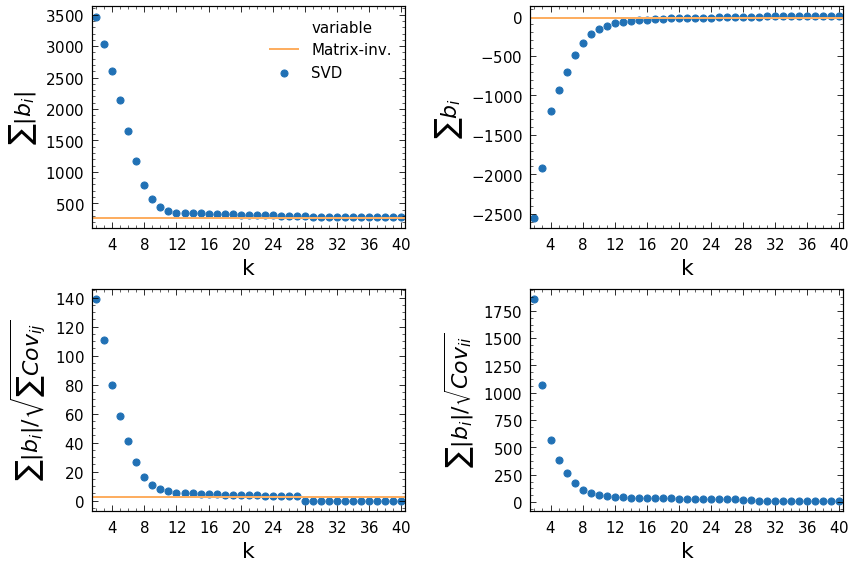

In [19]:
# compare the result
# User can define own plotting function
# some examples can be found in ./plotting.py

plot_unf_fom_my(k_arr, svd_fom, inv_fom, example_toy.show_var, leg=1) 

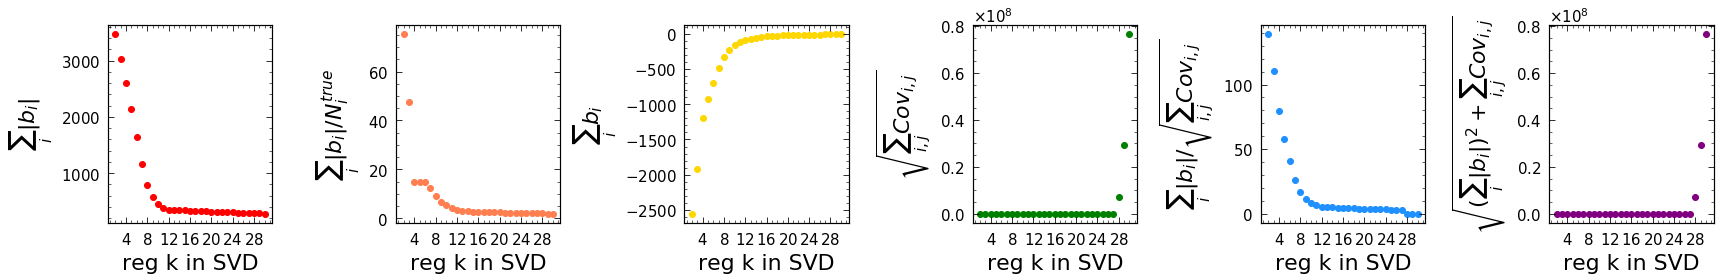

In [20]:
foms    = [svd_fom['fom_a'], svd_fom['fom_b'], svd_fom['fom_c'], svd_fom['fom_d'], svd_fom['fom_e'], svd_fom['fom_f']]

colors    = ['red', 'coral', 'gold', 'green', 'dodgerblue', 'purple', 'hotpink']

fom_names = ['$\sum_{i}{|b_{i}|}$', 
             '$\sum_{i}{|b_{i}|/N_{i}^{true}}$',
             '$\sum_{i}{b_{i}}$', 
             '$\sqrt{\sum_{i,j}Cov_{i,j}}$',
             '$\sum_{i}{|b_{i}|}/\sqrt{\sum_{i,j}Cov_{i,j}}$', 
             '$\sqrt{(\sum_{i}{|b_{i}|})^{2} + \sum_{i,j}Cov_{i,j}}$' ]

last_k = 29

# plot all k
#fig_svd_para = plot_compare_para(len(foms), fom_k, 'reg k in SVD', foms, fom_names, colors, 'variable')

# plot until last_k
fig_svd_para = plot_compare_para(len(foms), k_arr, 'reg k in SVD', foms, fom_names, colors, 'variable', last_k)
#fig_svd_para.savefig('svd_fom.pdf')

In the reality, it would be better to have a look at the response matrix (migration matrix) before actual unfolding, e.g. to get some feeling to improve the binning, where the guidelines include avoiding low stat. bin and bin_width << resolution.

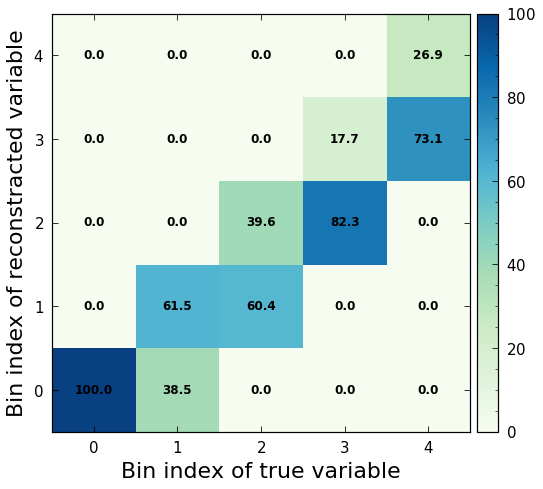

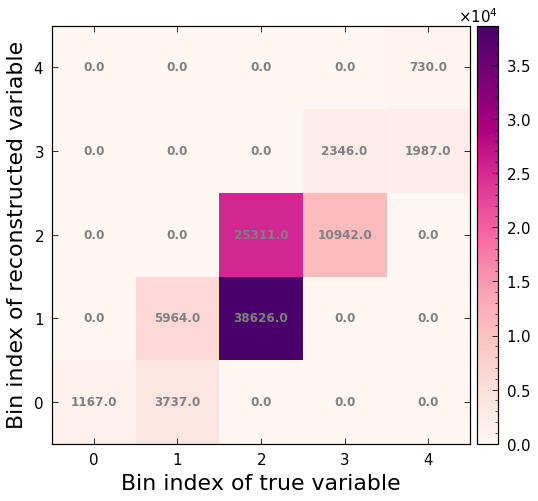

In [21]:
from pyroounfold.plotting import get_migration

# plot migration matrix and entries matrix

mig_matrix, hist, mig_fig, n_fig = get_migration(
    true_data =df_train['truth'], 
    reco_data =df_train['measured'], 
    weight    =df_train['weight'], 
    bin_var   =np.linspace(-10,10,6), 
    name_var  ='variable')